# MNIST + PCA
---
- Feature 784 ==> 주요 Feature로 압축

In [142]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## [1] 데이터 로딩

In [143]:
(x_train, y_train), (x_test, y_test)=load_data()

In [144]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## [2] 데이터 전처리 및 형변환

In [145]:
# 0~1사이 범위값으로 피쳐(Feature) 정규화
x_train=x_train/255.0
x_test=x_test/255.0

In [146]:
# PCA 2차원 데이터 처리 3D => 2D 형변환
x_train=x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)

In [147]:
print(f'x_train.shape : {x_train.shape}, x_test.shape : {x_test.shape}')

x_train.shape : (60000, 784), x_test.shape : (10000, 784)


## [2] MNIST의 PC(주성분 요소) 수 찾기
---

In [148]:
# PCA 객체 생성
pca=PCA(n_components=0.95)

In [149]:
# PC 계산
pca.fit(x_train)

PCA(n_components=0.95)

In [150]:
# PC 확인
print(f'pca.singular_values_ : {pca.singular_values_}\npca.explained_variance_ratio_ : {pca.explained_variance_ratio_}')

pca.singular_values_ : [554.08236184 473.79289646 441.76832659 412.90967564 392.45954891
 369.34743738 321.72592959 302.04650943 295.59576934 273.06366032
 258.31039157 252.97700677 232.98056847 231.36547104 223.47337767
 216.59463867 204.70103539 200.98426661 193.8016728  190.95856472
 183.65236363 178.45839561 173.68452004 169.90685928 167.17214551
 162.9474728  160.33074547 157.72351701 153.49152274 147.83552759
 144.28725    143.19277799 138.07150073 136.22239172 134.28567117
 131.13991042 126.49333601 124.2313057  123.40999747 122.22992796
 120.20481924 118.62713309 115.06215042 112.23881111 110.35705642
 108.93302362 107.01475474 105.46372614 103.71956692 100.90840213
 100.45950025  99.47658474  96.76475599  95.60902108  94.8075482
  92.66540711  92.3380578   90.42557427  89.59931997  87.99801628
  87.22623816  87.0004999   85.37550857  83.71483558  82.22568067
  80.9665046   80.14523835  78.90007754  78.10823212  77.24889952
  76.90918966  75.68727777  74.94785429  74.38349456  

In [151]:
# PC기반 데이터 투영
mnistPCA=pca.transform(x_train)

In [152]:
print(f'mnistPCA.shape : {mnistPCA.shape}')

mnistPCA.shape : (60000, 154)


In [153]:
# 압축된 피쳐성분기반 원래 성분 복원
reMnist=pca.inverse_transform(mnistPCA)
reMnist.shape

(60000, 784)

In [154]:
# PCA 전후 이미지 비교
def drawImage(selecImg, title):
    plt.imshow(selecImg.reshape(28,28), cmap='gray')
    plt.title(f'[{title}]')
    plt.show()

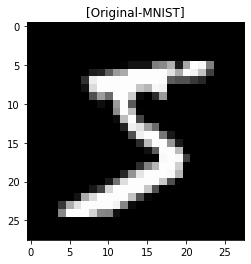

In [155]:
drawImage(x_train[0], 'Original-MNIST')

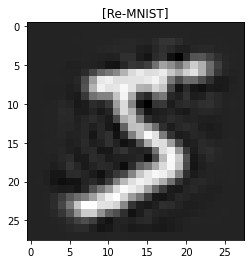

In [156]:
drawImage(reMnist[0], 'Re-MNIST')